## ParkSmart : Where Technology Meets Convenient Parking ! 

Finding parking on campus has become a daily struggle for many students and staff at King Saud University. As the university population grows, the traditional method of manually searching for parking spots—without any technological help—leads to frustration, wasted time, and traffic congestion. It's a common sight to see students driving around in circles, hoping to find an empty spot, which adds to the stress of their already busy day.

To better understand these challenges, we decided to focus on Gate 3, one of the busiest entry points to the university. We're currently surveying students who regularly use this gate to get their perspective on the parking situation. Their feedback will help us dive deeper into the problem and provide insights into how the current system is impacting their daily routines.

In this notebook, we'll analyze the survey results, including comments shared by the students, to get a clearer picture of their experiences. We’ll also apply some natural language processing (NLP) techniques to the comment section, helping us uncover patterns and common pain points. This analysis will guide us in designing SmartPark, a machine learning-based solution aimed at making parking smarter, faster, and less stressful for everyone on campus.

### loading the data 


In [1]:
import pandas as pd

# Load the CSV file into a DataFrame

data = pd.read_csv("ML_dataset.csv")

# Display the first few rows of the DataFrame
data.head()

,Submission Date,Flow Status,Do you drive yourself or use a driver?,When you arrive to the campus on Sunday?,Do you attend on Sunday?,When you leave the campus on Sunday?,Do you attend on Monday?,When you arrive to the campus on Monday?,When you leave the campus on Monday?,Do you attend on Tuesday?,...,When you leave the campus on Tuesday?,During what time do you find it challenging to find a parking spot on campus when you drive ?,How satisfied are you with the availability of parking spaces on campus?,Provide any additional comments if you wish,Do you attend on Wednesday?,When you arrive to the campus on Wednesday?,When you leave the campus on Wednesday?,Do you attend on Thursday?,When you arrive to the campus on Thursday?,When you leave the campus on Thursday?
0,"Sep 15, 2024",COMPLETED,Driver.,7:30 AM,Yes.,2:00 PM,Yes.,8:00 AM,2:00 PM,Yes.,...,2:00 PM,NaN,3,NaN,Yes.,8:00 AM,12:00 PM,Yes.,7:30 AM,2:00 PM
1,"Sep 15, 2024",NaN,Drive yourself.,7:00 AM,Yes.,12:00 PM,Yes.,7:00 AM,12:00 PM,Yes.,...,12:00 PM,07:00 AM,2,NaN,Yes.,8:30 AM,12:00 PM,Yes.,7:00 AM,12:00 PM
2,"Sep 15, 2024",NaN,Drive yourself.,7:00 AM,Yes.,12:00 PM,Yes.,12:00 PM,12:30 PM,Yes.,...,12:30 PM,08:00 AM,1,Our cars get extremely hot after sitting in th...,Yes.,8:00 AM,12:30 PM,Yes.,7:30 AM,12:30 PM
3,"Sep 15, 2024",NaN,Drive yourself.,NaN,No.,NaN,Yes.,7:00 AM,3:00 PM,Yes.,...,3:00 PM,07:30 AM,2,NaN,Yes.,7:00 AM,3:00 PM,No.,NaN,NaN
4,"Sep 15, 2024",NaN,Drive yourself.,8:00 AM,Yes.,12:00 PM,Yes.,8:00 AM,12:00 PM,Yes.,...,11:00 AM,08:00 AM,2,NaN,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM


In [2]:
# Calculate the number of columns
num_columns = data.shape[1]

# Get the names of the columns
column_names = data.columns.tolist()

# Calculate the number of responses (rows)
num_responses = data.shape[0]

# Print the results
print(f"Number of columns: {num_columns}")
print(f"Column names: {column_names}")
print(f"Number of responses: {num_responses}")

Number of columns: 21
Column names: ['Submission Date', 'Flow Status', 'Do you drive yourself or use a driver?', 'When you arrive to the campus on Sunday?', 'Do you attend on Sunday?', 'When you leave the campus on\xa0Sunday?', 'Do you attend on Monday?', 'When you arrive to the campus on Monday?', 'When you leave the campus on\xa0Monday?', 'Do you attend on Tuesday?', 'When you arrive to the campus on Tuesday?', 'When you leave the campus on\xa0Tuesday?', 'During what time do you find it challenging to find a parking spot on campus when you drive ? \xa0 \xa0\xa0', 'How satisfied are you with the availability of parking spaces on campus?', 'Provide any additional comments if you wish', 'Do you attend on Wednesday?', 'When you arrive to the campus on Wednesday?', 'When you leave the campus on\xa0Wednesday?', 'Do you attend on Thursday?', 'When you arrive to the campus on Thursday?', 'When you leave the campus on\xa0Thursday?']
Number of responses: 115


After publishing the survey to students who frequently use Gate 3 at King Saud University, we received 115 responses. The survey includes a wide range of questions, covering 21 different features. This rich dataset will allow us to conduct an in-depth analysis of peak congestion times and days, helping us better understand the parking situation at the university.

### Preprocessing :


In [3]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

Submission Date                                                                                         0
Flow Status                                                                                           114
Do you drive yourself or use a driver?                                                                  0
When you arrive to the campus on Sunday?                                                                1
Do you attend on Sunday?                                                                                0
When you leave the campus on Sunday?                                                                    1
Do you attend on Monday?                                                                                0
When you arrive to the campus on Monday?                                                               29
When you leave the campus on Monday?                                                                   29
Do you attend on Tuesday?                     

In [4]:
# Drop the 'Flow Status' column as it has 114 null values + not important 
data = data.drop(columns=['Flow Status'])
data.head()

,Submission Date,Do you drive yourself or use a driver?,When you arrive to the campus on Sunday?,Do you attend on Sunday?,When you leave the campus on Sunday?,Do you attend on Monday?,When you arrive to the campus on Monday?,When you leave the campus on Monday?,Do you attend on Tuesday?,When you arrive to the campus on Tuesday?,When you leave the campus on Tuesday?,During what time do you find it challenging to find a parking spot on campus when you drive ?,How satisfied are you with the availability of parking spaces on campus?,Provide any additional comments if you wish,Do you attend on Wednesday?,When you arrive to the campus on Wednesday?,When you leave the campus on Wednesday?,Do you attend on Thursday?,When you arrive to the campus on Thursday?,When you leave the campus on Thursday?
0,"Sep 15, 2024",Driver.,7:30 AM,Yes.,2:00 PM,Yes.,8:00 AM,2:00 PM,Yes.,7:30 AM,2:00 PM,NaN,3,NaN,Yes.,8:00 AM,12:00 PM,Yes.,7:30 AM,2:00 PM
1,"Sep 15, 2024",Drive yourself.,7:00 AM,Yes.,12:00 PM,Yes.,7:00 AM,12:00 PM,Yes.,7:30 AM,12:00 PM,07:00 AM,2,NaN,Yes.,8:30 AM,12:00 PM,Yes.,7:00 AM,12:00 PM
2,"Sep 15, 2024",Drive yourself.,7:00 AM,Yes.,12:00 PM,Yes.,12:00 PM,12:30 PM,Yes.,7:30 AM,12:30 PM,08:00 AM,1,Our cars get extremely hot after sitting in th...,Yes.,8:00 AM,12:30 PM,Yes.,7:30 AM,12:30 PM
3,"Sep 15, 2024",Drive yourself.,NaN,No.,NaN,Yes.,7:00 AM,3:00 PM,Yes.,7:00 AM,3:00 PM,07:30 AM,2,NaN,Yes.,7:00 AM,3:00 PM,No.,NaN,NaN
4,"Sep 15, 2024",Drive yourself.,8:00 AM,Yes.,12:00 PM,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,11:00 AM,08:00 AM,2,NaN,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM


In [5]:
#Switch the places بس كذا ارتب 
# Get the list of columns
columns = list(data.columns)

# Find the indices of the two columns to swap
idx_arrival = columns.index("When you arrive to the campus on Sunday?")
idx_attend = columns.index("Do you attend on Sunday?")

# Swap the columns
columns[idx_arrival], columns[idx_attend] = columns[idx_attend], columns[idx_arrival]

# Reorder the dataframe based on the new column order
data = data[columns]

# Display the updated column order
print(data.columns)

Index(['Submission Date', 'Do you drive yourself or use a driver?',
       'Do you attend on Sunday?', 'When you arrive to the campus on Sunday?',
       'When you leave the campus on Sunday?', 'Do you attend on Monday?',
       'When you arrive to the campus on Monday?',
       'When you leave the campus on Monday?', 'Do you attend on Tuesday?',
       'When you arrive to the campus on Tuesday?',
       'When you leave the campus on Tuesday?',
       'During what time do you find it challenging to find a parking spot on campus when you drive ?     ',
       'How satisfied are you with the availability of parking spaces on campus?',
       'Provide any additional comments if you wish',
       'Do you attend on Wednesday?',
       'When you arrive to the campus on Wednesday?',
       'When you leave the campus on Wednesday?', 'Do you attend on Thursday?',
       'When you arrive to the campus on Thursday?',
       'When you leave the campus on Thursday?'],
      dtype='object')


In [6]:
data = data.drop(columns=['Submission Date']) # not important 
data.head()

,Do you drive yourself or use a driver?,Do you attend on Sunday?,When you arrive to the campus on Sunday?,When you leave the campus on Sunday?,Do you attend on Monday?,When you arrive to the campus on Monday?,When you leave the campus on Monday?,Do you attend on Tuesday?,When you arrive to the campus on Tuesday?,When you leave the campus on Tuesday?,During what time do you find it challenging to find a parking spot on campus when you drive ?,How satisfied are you with the availability of parking spaces on campus?,Provide any additional comments if you wish,Do you attend on Wednesday?,When you arrive to the campus on Wednesday?,When you leave the campus on Wednesday?,Do you attend on Thursday?,When you arrive to the campus on Thursday?,When you leave the campus on Thursday?
0,Driver.,Yes.,7:30 AM,2:00 PM,Yes.,8:00 AM,2:00 PM,Yes.,7:30 AM,2:00 PM,NaN,3,NaN,Yes.,8:00 AM,12:00 PM,Yes.,7:30 AM,2:00 PM
1,Drive yourself.,Yes.,7:00 AM,12:00 PM,Yes.,7:00 AM,12:00 PM,Yes.,7:30 AM,12:00 PM,07:00 AM,2,NaN,Yes.,8:30 AM,12:00 PM,Yes.,7:00 AM,12:00 PM
2,Drive yourself.,Yes.,7:00 AM,12:00 PM,Yes.,12:00 PM,12:30 PM,Yes.,7:30 AM,12:30 PM,08:00 AM,1,Our cars get extremely hot after sitting in th...,Yes.,8:00 AM,12:30 PM,Yes.,7:30 AM,12:30 PM
3,Drive yourself.,No.,NaN,NaN,Yes.,7:00 AM,3:00 PM,Yes.,7:00 AM,3:00 PM,07:30 AM,2,NaN,Yes.,7:00 AM,3:00 PM,No.,NaN,NaN
4,Drive yourself.,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,11:00 AM,08:00 AM,2,NaN,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM


In [7]:
# Display the data type of each column
print(data.dtypes)


Do you drive yourself or use a driver?                                                                object
Do you attend on Sunday?                                                                              object
When you arrive to the campus on Sunday?                                                              object
When you leave the campus on Sunday?                                                                  object
Do you attend on Monday?                                                                              object
When you arrive to the campus on Monday?                                                              object
When you leave the campus on Monday?                                                                  object
Do you attend on Tuesday?                                                                             object
When you arrive to the campus on Tuesday?                                                             object
When you leave the 

In [9]:
# Rename the column to remove extra spaces commig from the google forms 
data = data.rename(columns={'During what time do you find it challenging to find a parking spot on campus when you drive ? \xa0 \xa0\xa0': 'Parking Challenge Time'})

# Fill missing values in the renamed column 
data['Parking Challenge Time'] = data['Parking Challenge Time'].fillna(method='ffill')

missing_values = data.isnull().sum()
print(missing_values)


Do you drive yourself or use a driver?                                       0
Do you attend on Sunday?                                                     0
When you arrive to the campus on Sunday?                                     1
When you leave the campus on Sunday?                                         1
Do you attend on Monday?                                                     0
When you arrive to the campus on Monday?                                    29
When you leave the campus on Monday?                                        29
Do you attend on Tuesday?                                                    0
When you arrive to the campus on Tuesday?                                    3
When you leave the campus on Tuesday?                                        3
Parking Challenge Time                                                       1
How satisfied are you with the availability of parking spaces on campus?     0
Provide any additional comments if you wish         

C:\Users\basha\AppData\Local\Temp\ipykernel_34160\3988670038.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Parking Challenge Time'] = data['Parking Challenge Time'].fillna(method='ffill')


In [10]:
data.head()
# the value of the first row is nan as ffill method uses the value from the previous to fill in the missing value.

,Do you drive yourself or use a driver?,Do you attend on Sunday?,When you arrive to the campus on Sunday?,When you leave the campus on Sunday?,Do you attend on Monday?,When you arrive to the campus on Monday?,When you leave the campus on Monday?,Do you attend on Tuesday?,When you arrive to the campus on Tuesday?,When you leave the campus on Tuesday?,Parking Challenge Time,How satisfied are you with the availability of parking spaces on campus?,Provide any additional comments if you wish,Do you attend on Wednesday?,When you arrive to the campus on Wednesday?,When you leave the campus on Wednesday?,Do you attend on Thursday?,When you arrive to the campus on Thursday?,When you leave the campus on Thursday?
0,Driver.,Yes.,7:30 AM,2:00 PM,Yes.,8:00 AM,2:00 PM,Yes.,7:30 AM,2:00 PM,NaN,3,NaN,Yes.,8:00 AM,12:00 PM,Yes.,7:30 AM,2:00 PM
1,Drive yourself.,Yes.,7:00 AM,12:00 PM,Yes.,7:00 AM,12:00 PM,Yes.,7:30 AM,12:00 PM,07:00 AM,2,NaN,Yes.,8:30 AM,12:00 PM,Yes.,7:00 AM,12:00 PM
2,Drive yourself.,Yes.,7:00 AM,12:00 PM,Yes.,12:00 PM,12:30 PM,Yes.,7:30 AM,12:30 PM,08:00 AM,1,Our cars get extremely hot after sitting in th...,Yes.,8:00 AM,12:30 PM,Yes.,7:30 AM,12:30 PM
3,Drive yourself.,No.,NaN,NaN,Yes.,7:00 AM,3:00 PM,Yes.,7:00 AM,3:00 PM,07:30 AM,2,NaN,Yes.,7:00 AM,3:00 PM,No.,NaN,NaN
4,Drive yourself.,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,11:00 AM,08:00 AM,2,NaN,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM


In [11]:
if pd.isna(data['Parking Challenge Time'].iloc[0]): # fix it 
    data['Parking Challenge Time'].iloc[0] = data['Parking Challenge Time'].iloc[1]

# verify the change
print(data['Parking Challenge Time'].head())

0    07:00 AM
1    07:00 AM
2    08:00 AM
3    07:30 AM
4    08:00 AM
Name: Parking Challenge Time, dtype: object


C:\Users\basha\AppData\Local\Temp\ipykernel_34160\1998459528.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Parking Challenge Time'].iloc[0] = data['Parking Challenge Time'].iloc[1]
C:\Users\basha\AppData\Local\Temp\ipykernel_3416

In [12]:

missing_values = data.isnull().sum()
print(missing_values)

Do you drive yourself or use a driver?                                       0
Do you attend on Sunday?                                                     0
When you arrive to the campus on Sunday?                                     1
When you leave the campus on Sunday?                                         1
Do you attend on Monday?                                                     0
When you arrive to the campus on Monday?                                    29
When you leave the campus on Monday?                                        29
Do you attend on Tuesday?                                                    0
When you arrive to the campus on Tuesday?                                    3
When you leave the campus on Tuesday?                                        3
Parking Challenge Time                                                       0
How satisfied are you with the availability of parking spaces on campus?     0
Provide any additional comments if you wish         

For the remaining missing values, we'll assess during the analysis whether any additional adjustments are necessary.








#### Time parsing (no need )
In the time parsing step during preprocessing, conversion is not necessary since I discovered that Google Forms automatically converts the columns into time format.








In [ ]:
# Rename the columns to remove extra spaces
#data = data.rename(columns={
 #   'When you leave the campus on\xa0Sunday?': 'When you leave the campus on Sunday?',
 #   'When you leave the campus on\xa0Monday?': 'When you leave the campus on Monday?',
 #   'When you leave the campus on\xa0Tuesday?': 'When you leave the campus on Tuesday?',
 #   'When you leave the campus on\xa0Wednesday?': 'When you leave the campus on Wednesday?',
 #   'When you leave the campus on\xa0Thursday?': 'When you leave the campus on Thursday?'
#})

time_columns = [
    'When you arrive to the campus on Sunday?',
    'When you leave the campus on Sunday?',
    'When you arrive to the campus on Monday?',
    'When you leave the campus on Monday?',
    'When you arrive to the campus on Tuesday?',
    'When you leave the campus on Tuesday?',
    'When you arrive to the campus on Wednesday?',
    'When you leave the campus on Wednesday?',
    'When you arrive to the campus on Thursday?',
    'When you leave the campus on Thursday?'
]

# Convert the time columns to datetime format
#for col in time_columns:
    #data[col] = pd.to_datetime(data[col], format='%I:%M %p', errors='coerce').dt.time

# Verify the changes
#data.head()


#### Save the preprocessed data 

In [13]:
# Save the preprocessed dataframe to a csv file

data.to_csv('cleaned_data2.csv', index=False)

#### Load the preprocessed data 

In [14]:
# Load the preprocessed data from the CSV file
cleaned_data = pd.read_csv('cleaned_data2.csv')
cleaned_data.head()

,Do you drive yourself or use a driver?,Do you attend on Sunday?,When you arrive to the campus on Sunday?,When you leave the campus on Sunday?,Do you attend on Monday?,When you arrive to the campus on Monday?,When you leave the campus on Monday?,Do you attend on Tuesday?,When you arrive to the campus on Tuesday?,When you leave the campus on Tuesday?,Parking Challenge Time,How satisfied are you with the availability of parking spaces on campus?,Provide any additional comments if you wish,Do you attend on Wednesday?,When you arrive to the campus on Wednesday?,When you leave the campus on Wednesday?,Do you attend on Thursday?,When you arrive to the campus on Thursday?,When you leave the campus on Thursday?
0,Driver.,Yes.,7:30 AM,2:00 PM,Yes.,8:00 AM,2:00 PM,Yes.,7:30 AM,2:00 PM,07:00 AM,3,NaN,Yes.,8:00 AM,12:00 PM,Yes.,7:30 AM,2:00 PM
1,Drive yourself.,Yes.,7:00 AM,12:00 PM,Yes.,7:00 AM,12:00 PM,Yes.,7:30 AM,12:00 PM,07:00 AM,2,NaN,Yes.,8:30 AM,12:00 PM,Yes.,7:00 AM,12:00 PM
2,Drive yourself.,Yes.,7:00 AM,12:00 PM,Yes.,12:00 PM,12:30 PM,Yes.,7:30 AM,12:30 PM,08:00 AM,1,Our cars get extremely hot after sitting in th...,Yes.,8:00 AM,12:30 PM,Yes.,7:30 AM,12:30 PM
3,Drive yourself.,No.,NaN,NaN,Yes.,7:00 AM,3:00 PM,Yes.,7:00 AM,3:00 PM,07:30 AM,2,NaN,Yes.,7:00 AM,3:00 PM,No.,NaN,NaN
4,Drive yourself.,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,11:00 AM,08:00 AM,2,NaN,Yes.,8:00 AM,12:00 PM,Yes.,8:00 AM,12:00 PM


### Descriptive Analysis

In [15]:
# Summary of the data structure
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Do you drive yourself or use a driver?                                    115 non-null    object
 1   Do you attend on Sunday?                                                  115 non-null    object
 2   When you arrive to the campus on Sunday?                                  114 non-null    object
 3   When you leave the campus on Sunday?                                      114 non-null    object
 4   Do you attend on Monday?                                                  115 non-null    object
 5   When you arrive to the campus on Monday?                                  86 non-null     object
 6   When you leave the campus on Monday?                                      

##### Bar chart for Percentage of Driving Preferences

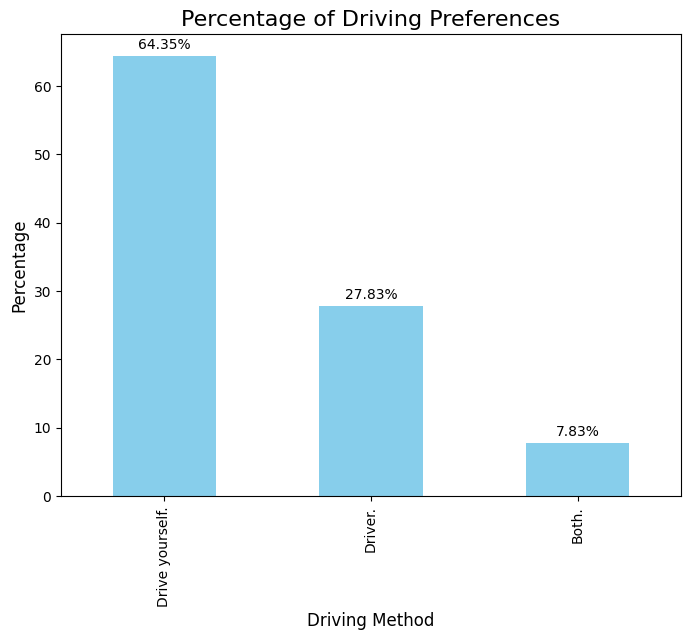

In [16]:
import matplotlib.pyplot as plt



# calculate percentage for each category in 'Do you drive yourself or use a driver?' column
drive_data = cleaned_data['Do you drive yourself or use a driver?'].value_counts(normalize=True) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
drive_data.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title("Percentage of Driving Preferences", fontsize=16)
plt.xlabel("Driving Method", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

# Show percentage on the bars
for index, value in enumerate(drive_data):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

# Display the chart
plt.show()

The bar chart shows the distribution of driving preferences among the respondents. The results indicate that:

64.35% of the respondents drive themselves to the university.
27.83% use a driver.
7.83% use both methods (drive themselves or use a driver, depending on the situation).
We believe that the high percentage of respondents who drive themselves may be due to the fact that the survey was distributed among a group of girls who frequently drive to Gate 3. This has likely caused a bias in the data, as this group might not represent the broader student population, particularly those who rely more heavily on drivers. Therefore, the results should be interpreted with caution.

#### Satisfaction with Parking Space Availability

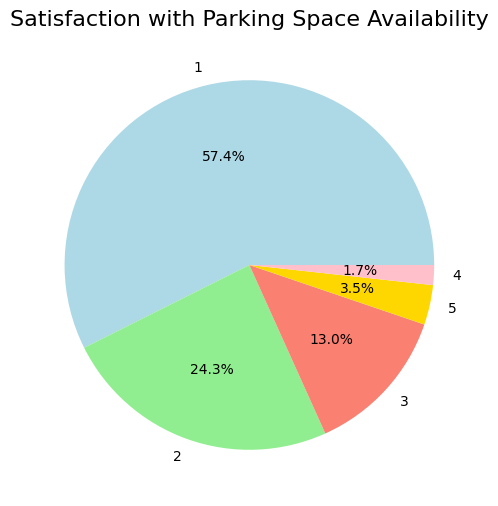

In [17]:

# Calculate the percentage for each satisfaction level
satisfaction_data = cleaned_data['How satisfied are you with the availability of parking spaces on campus?'].value_counts(normalize=True) * 100

# Create a pie chart for satisfaction levels
plt.figure(figsize=(8, 6))
satisfaction_data.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon', 'gold', 'pink'])

# Add title and hide the ylabel
plt.title("Satisfaction with Parking Space Availability", fontsize=16)
plt.ylabel('')  # Hides the y-axis label

# Display the pie chart
plt.show()

The majority of the respondents (over 80%) are dissatisfied with the parking availability, with most of them giving the lowest rating possible. Very few people are satisfied, indicating this is a significant issue for the university community.

The following code will adjust the "Parking Challenge Time" column by replacing any times after 3 PM with the mean time for that column. 

In [18]:
import numpy as np
# Convert "Parking Challenge Time" to datetime and replace any time after 3 PM with the mean time
def correct_parking_challenge_time(col):
    # Convert the column to datetime, assuming times are in 12-hour format
    col = pd.to_datetime(col, format='%I:%M %p', errors='coerce').dt.time
    
    # Convert to seconds since midnight for easier comparison
    col_seconds = col.apply(lambda x: x.hour * 3600 + x.minute * 60 if pd.notnull(x) else np.nan)
    
    # Define 3 PM in seconds (15:00)
    three_pm_seconds = 15 * 3600
    
    # Calculate the mean time (in seconds) for the column, excluding times after 3 PM
    mean_time_seconds = col_seconds[col_seconds <= three_pm_seconds].mean()
    
    # Replace times after 3 PM with the mean time
    col_seconds = col_seconds.apply(lambda x: mean_time_seconds if x > three_pm_seconds else x)
    
    # Convert back to HH:MM format
    corrected_col = col_seconds.apply(lambda x: pd.to_datetime(x, unit='s').strftime('%I:%M %p') if pd.notnull(x) else np.nan)
    
    return corrected_col

# Apply the function to the 'Parking Challenge Time' column
cleaned_data['Parking Challenge Time'] = correct_parking_challenge_time(cleaned_data['Parking Challenge Time'])

# Display the first few rows to check the corrected times
print(cleaned_data['Parking Challenge Time'].head())

0    07:00 AM
1    07:00 AM
2    08:00 AM
3    07:30 AM
4    08:00 AM
Name: Parking Challenge Time, dtype: object


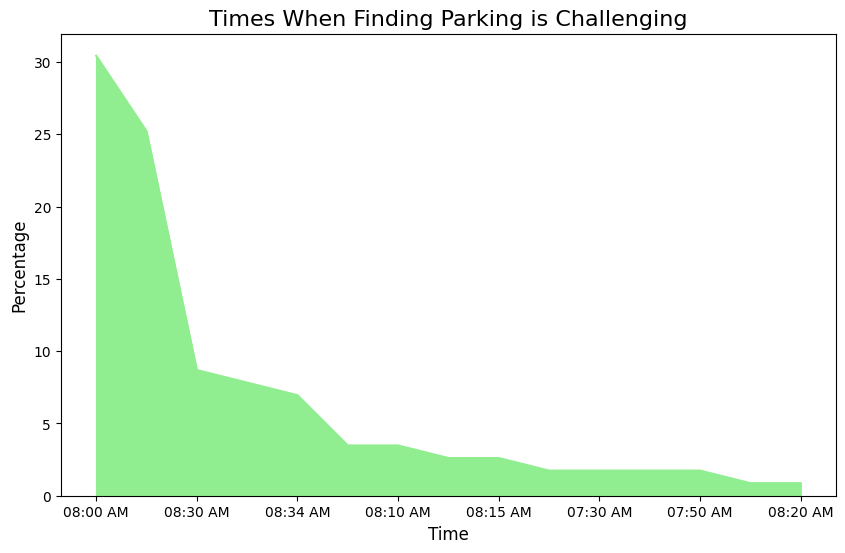

In [19]:

# Calculate the percentage for each category in the 'Parking Challenge Time' column
parking_challenge_data = cleaned_data['Parking Challenge Time'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
parking_challenge_data.plot(kind='area', color='lightgreen')

# Add title and labels
plt.title("Times When Finding Parking is Challenging", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Percentage", fontsize=12)

# Display the area chart
plt.show()

The data shows that parking availability is a significant issue primarily at 8:00 AM from the drivers point of view, after which the difficulty decreases. This likely indicates a rush hour scenario around the beginning of the university day

#### Attendance Comparison Between Days

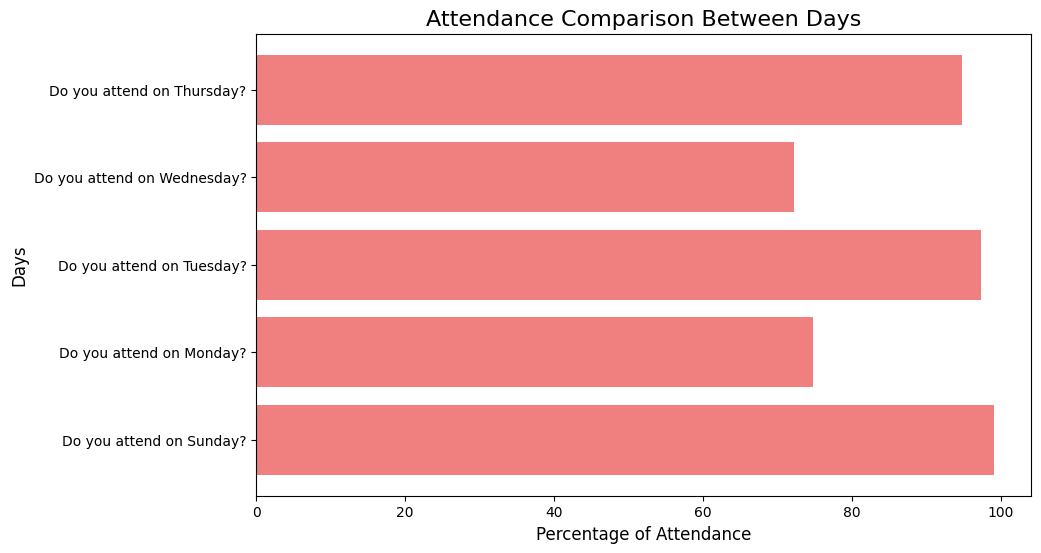

In [20]:

# List of columns representing attendance on different days
attendance_columns = ['Do you attend on Sunday?', 'Do you attend on Monday?', 'Do you attend on Tuesday?',
                      'Do you attend on Wednesday?', 'Do you attend on Thursday?']

# Calculate attendance for each day (count of 'Yes' responses)
attendance_data = {day: cleaned_data[day].value_counts(normalize=True).get('Yes.', 0) * 100 for day in attendance_columns}

plt.figure(figsize=(10, 6))
plt.barh(list(attendance_data.keys()), list(attendance_data.values()), color='lightcoral')

# Add title and labels
plt.title("Attendance Comparison Between Days", fontsize=16)
plt.xlabel("Percentage of Attendance", fontsize=12)
plt.ylabel("Days", fontsize=12)

# Display the horizontal bar chart
plt.show()

Sunday stands out as the busiest day, followed closely by Thursday  and Tuesday.
Wednesday appears to be the least busy day, potentially indicating a lighter schedule for students or staff on that day.
These attendance patterns could provide insights for the parking availablity

#### Arrival and leave times for each day

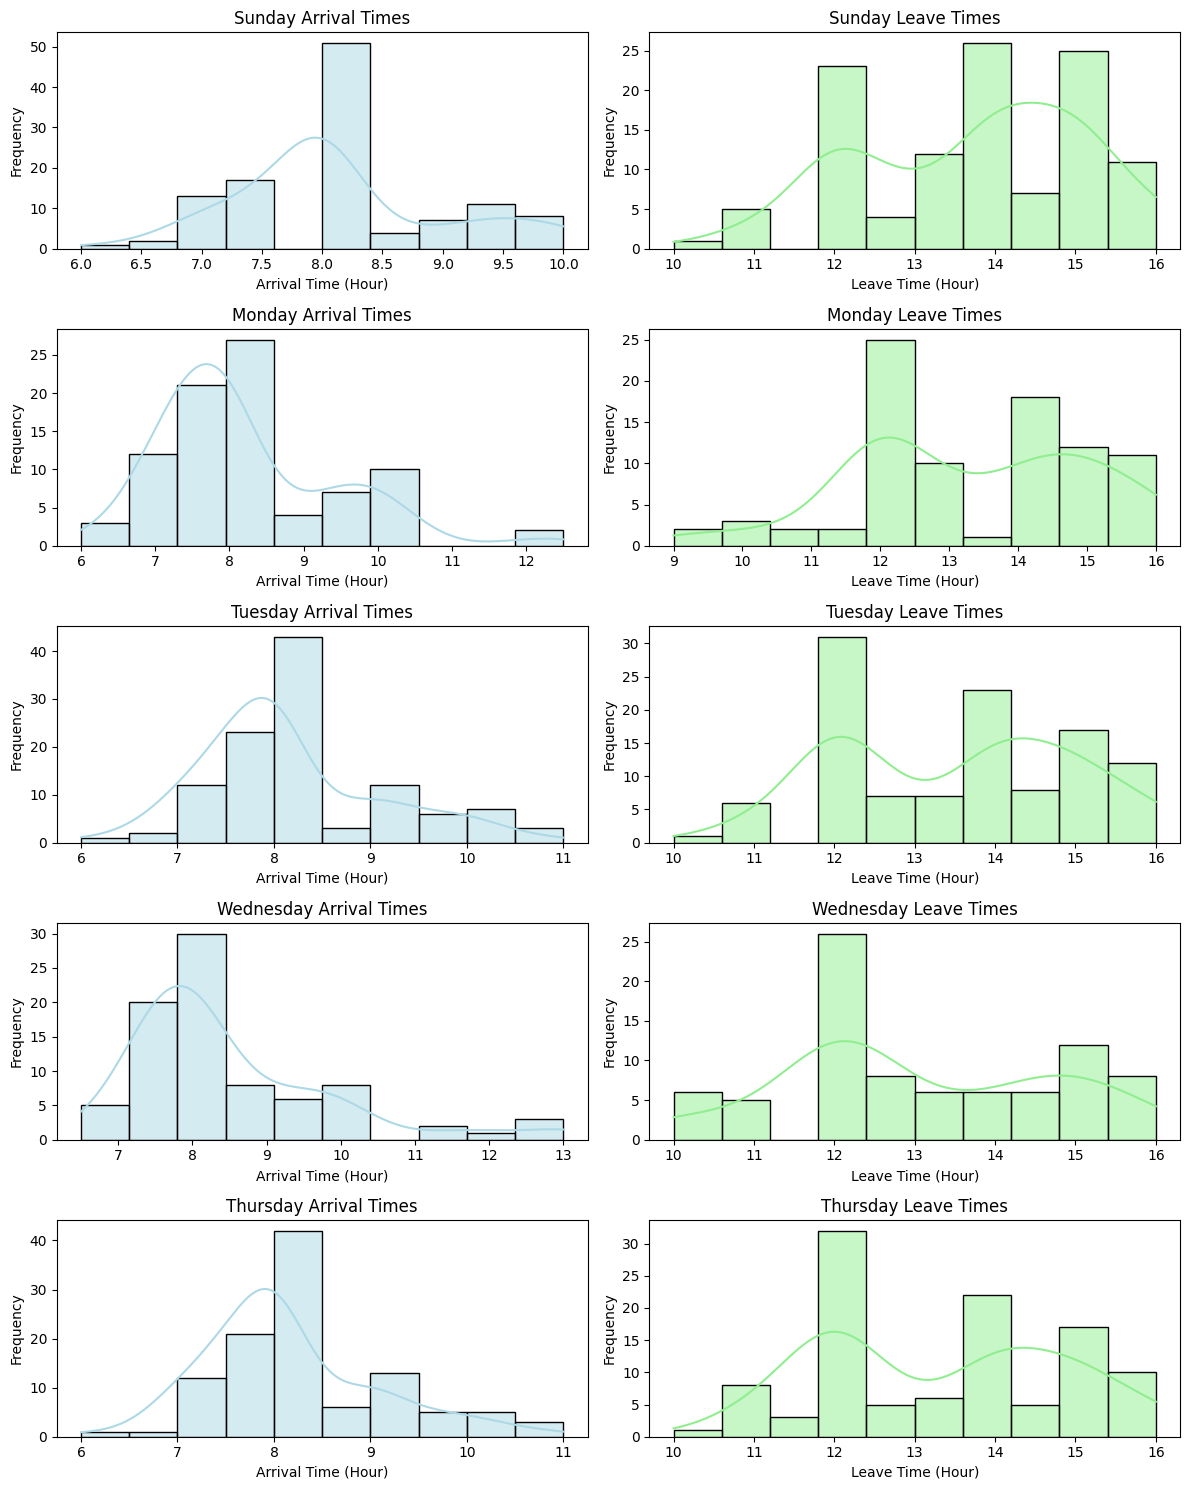

In [24]:
import seaborn as sns

cleaned_data = cleaned_data.rename(columns={
    'When you leave the campus on\xa0Sunday?': 'When you leave the campus on Sunday?',
    'When you leave the campus on\xa0Monday?': 'When you leave the campus on Monday?',
    'When you leave the campus on\xa0Tuesday?': 'When you leave the campus on Tuesday?',
    'When you leave the campus on\xa0Wednesday?': 'When you leave the campus on Wednesday?',
    'When you leave the campus on\xa0Thursday?': 'When you leave the campus on Thursday?'
})
# Days of the week and corresponding arrival/leave time columns
days_and_columns = {
    'Sunday': ['When you arrive to the campus on Sunday?', 'When you leave the campus on Sunday?'],
    'Monday': ['When you arrive to the campus on Monday?', 'When you leave the campus on Monday?'],
    'Tuesday': ['When you arrive to the campus on Tuesday?', 'When you leave the campus on Tuesday?'],
    'Wednesday': ['When you arrive to the campus on Wednesday?', 'When you leave the campus on Wednesday?'],
    'Thursday': ['When you arrive to the campus on Thursday?', 'When you leave the campus on Thursday?']
}

# Function to convert time columns and drop NaN values
def convert_time_column(col):
    return pd.to_datetime(cleaned_data[col], format='%I:%M %p', errors='coerce').dropna()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Loop through each day and its arrival/leave columns
for idx, (day, columns) in enumerate(days_and_columns.items()):
    arrival_col, leave_col = columns
    
    # Convert and clean time columns for arrival and leave times, excluding NaN values
    arrival_times = convert_time_column(arrival_col)
    leave_times = convert_time_column(leave_col)
    
    # Plot arrival times with histogram and KDE line
    if not arrival_times.empty:
        sns.histplot(arrival_times.dt.hour + arrival_times.dt.minute / 60, kde=True, color='lightblue', ax=axes[idx, 0], bins=10)
        axes[idx, 0].set_title(f'{day} Arrival Times')
        axes[idx, 0].set_xlabel('Arrival Time (Hour)')
        axes[idx, 0].set_ylabel('Frequency')
    
    # Plot leave times with histogram and KDE line
    if not leave_times.empty:
        sns.histplot(leave_times.dt.hour + leave_times.dt.minute / 60, kde=True, color='lightgreen', ax=axes[idx, 1], bins=10)
        axes[idx, 1].set_title(f'{day} Leave Times')
        axes[idx, 1].set_xlabel('Leave Time (Hour)')
        axes[idx, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


1. Sunday:
Arrival Times:
Most students arrive between 7:30 AM and 8:30 AM, with the peak around 8:00 AM.
There is a smaller group arriving later, but the majority come before 9:00 AM.
Leave Times:
Leave times are spread out between 10:00 AM and 4:00 PM, with peaks at 11:00 AM, 1:00 PM, and 3:00 PM.
This suggests varied schedules, with no clear majority leaving at the same time.
2. Monday:
Arrival Times:
Most students arrive between 7:30 AM and 9:00 AM, with a peak at around 8:00 AM.
There’s a sharp drop in arrivals after 9:00 AM.
Leave Times:
Similar to Sunday, leave times are distributed between 10:00 AM and 4:00 PM.
The largest number of students leave between 12:00 PM and 1:00 PM, indicating a heavier midday departure.
3. Tuesday:
Arrival Times:
The majority of students arrive between 7:30 AM and 8:30 AM, with the most significant peak at 8:00 AM.
There are fewer arrivals after 9:00 AM.
Leave Times:
Departure times are spread between 10:00 AM and 4:00 PM, with the largest concentration between 12:00 PM and 1:00 PM.
This pattern is similar to Monday, indicating many students may have overlapping schedules.
4. Wednesday:
Arrival Times:
Most students arrive between 8:00 AM and 9:00 AM, with a notable peak around 8:00 AM.
Some arrivals continue until 10:00 AM, but the majority come earlier.
Leave Times:
Most students leave between 11:00 AM and 4:00 PM, with peaks at 12:00 PM, 1:00 PM, and 3:00 PM.
This day has a more evenly distributed departure pattern.
5. Thursday:
Arrival Times:
The majority of students arrive between 7:30 AM and 8:30 AM, with the peak at 8:00 AM.
Arrival frequency drops sharply after 9:00 AM.
Leave Times:
Students tend to leave between 11:00 AM and 4:00 PM, with the most significant peaks at 12:00 PM and 3:00 PM.
There are fewer students leaving earlier in the day compared to other days.


General Insights:


Arrival Patterns: Across all days, there is a consistent peak around 8:00 AM, suggesting that many students have morning classes or activities starting around that time.


Leave Patterns: The most common leave times are between 12:00 PM and 1:00 PM, with smaller peaks around 3:00 PM on several days. This indicates a concentration of students either finishing classes around midday or later in the afternoon.

Midday Departure: Many students leave campus around 12:00 PM to 1:00 PM across most days, suggesting lunch breaks or the end of morning sessions.

Less Variation in Arrival: Arrival times are more tightly concentrated between 7:30 AM and 9:00 AM, whereas leave times are more spread out, showing diverse schedules throughout the day.

#### Translate comments using googletrans

In [27]:
from googletrans import Translator
import pandas as pd



# Initialize the Google Translator
translator = Translator()

# Function to translate text to English
def translate_to_english(text):
    try:
        # Detect the language and translate to English
        translation = translator.translate(text, dest='en')
        return translation.text
    except Exception as e:
        # In case of any error, return the original text
        return text

# Apply the translation function to the 'Provide any additional comments if you wish' column
cleaned_data['Translated Comments'] = cleaned_data['Provide any additional comments if you wish'].dropna().apply(translate_to_english)

# Display the first few translated comments
print(cleaned_data[['Provide any additional comments if you wish', 'Translated Comments']].head())


         Provide any additional comments if you wish  \
0                                                NaN   
1                                                NaN   
2  Our cars get extremely hot after sitting in th...   
3                                                NaN   
4                                                NaN   

                                 Translated Comments  
0                                                NaN  
1                                                NaN  
2  Our cars get extremely hot after sitting in th...  
3                                                NaN  
4                                                NaN  


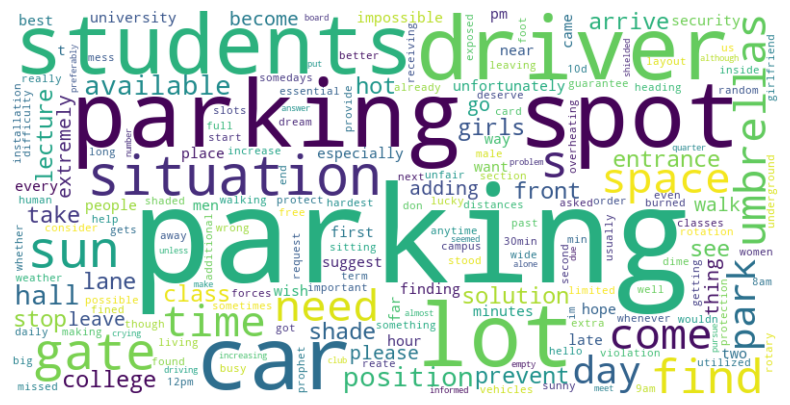

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import pandas as pd


# Drop rows with NaN values in 'Translated Comments'
cleaned_comments = cleaned_data['Translated Comments'].dropna()

# Combine all comments into one string
comments = ' '.join(cleaned_comments)

# Convert text to lowercase and remove punctuation
comments = comments.lower().translate(str.maketrans('', '', string.punctuation))

# Get the English stopwords list from nltk
stop_words_english = set(stopwords.words('english'))

# Filter out stopwords
filtered_words = [word for word in comments.split() if word not in stop_words_english]

# Generate the word cloud from the filtered words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud reveals the main concerns users have about parking:

Parking spots are the most discussed topic, with users expressing frustration over finding available spots.
Students and drivers frequently mention issues related to Gate 3, highlighting bottlenecks or access difficulties at this entry point.
Many comments refer to time spent searching for parking, reflecting frustrations over how long it takes to find a spot.
Users also mention concerns about sun exposure and the need for shade, indicating a desire for covered parking to protect cars from the heat.
Words like solution and suggest show that some users are offering ideas to improve the parking situation, possibly suggesting shaded areas or better lot organization.


Overall, the word cloud emphasizes difficulties with parking availability, heat exposure, and the time it takes to find a spot, while also highlighting a desire for solutions to these issues.

#### Sentiment Analysis

For a bit of fun and to try something new, we decided to experiment with Sentiment Analysis on the comments column. We used a pre-trained model from Hugging Face called "bhadresh-savani/distilbert-base-uncased-emotion", which builds on DistilBERT, a lightweight and efficient version of BERT. This model can pick up on a range of emotions, including joy, sadness, anger, fear, and more.

The way it works is pretty cool — it looks at each comment and gives a score for multiple emotions, ultimately identifying the one with the highest score as the main emotion. What’s great about this model is how it finds the sweet spot between being fast and accurate, making it perfect for tasks like ours where we need quick, reliable results without heavy processing, that why we chose it.

c:\Users\basha\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\basha\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\basha\.cache\huggingface\hub\models--bhadresh-savani--distilbert-base-uncased-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode

                                 Translated Comments Emotion
0                                                NaN     NaN
1                                                NaN     NaN
2  Our cars get extremely hot after sitting in th...    love
3                                                NaN     NaN
4                                                NaN     NaN


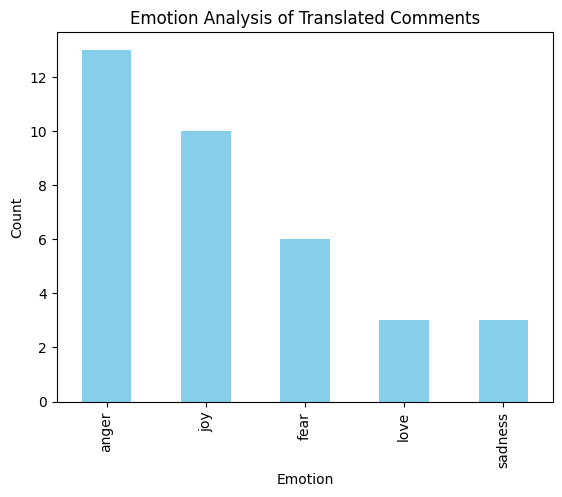

In [30]:
from transformers import pipeline
import pandas as pd

# Load the emotion detection model from Hugging Face
emotion_classifier = pipeline("text-classification", model="bhadresh-savani/distilbert-base-uncased-emotion", return_all_scores=True)

# Function to predict emotion based on the translated comments
def get_emotion(text):
    try:
        # Get the emotion scores for the text
        result = emotion_classifier(text)
        # Find the emotion with the highest score
        emotions = {item['label']: item['score'] for item in result[0]}
        # Return the emotion with the highest score
        return max(emotions, key=emotions.get)
    except Exception as e:
        return None  # In case of an error, return None

# Apply the emotion detection function to the 'Translated Comments' column
cleaned_data['Emotion'] = cleaned_data['Translated Comments'].dropna().apply(get_emotion)

# Display the first few rows with detected emotions
print(cleaned_data[['Translated Comments', 'Emotion']].head())

# Count the number of comments in each emotion category
emotion_counts = cleaned_data['Emotion'].value_counts()

# Visualize the emotion distribution
import matplotlib.pyplot as plt

emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Analysis of Translated Comments')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


Analysis of the Emotion Distribution:
From the bar chart, we can see the distribution of emotions detected by the model in the translated comments:

Anger: The highest emotion detected, with 13 occurrences. This is expected if many comments were expressing frustration or dissatisfaction (for example, complaints about parking availability).

Joy: Surprisingly, 10 occurrences were classified as joy. This seems inconsistent given the context of frustration and complaints mentioned.

Fear: Detected 6 times, which may indicate concerns or worries expressed in the comments.

Love: Detected 2 times, which might occur if users expressed positive or appreciative comments (e.g., about specific improvements).

Sadness: Detected 2 times, indicating comments expressing disappointment or frustration.

Why is Joy Detected in Frustrated Comments?
The model might sometimes classify comments as "joy" or other positive emotions even when the context is negative. This happens due to:

Polarity Shifts in Comments:

Some comments might mix different emotions (e.g., a comment that starts with a complaint and ends with a hopeful or positive remark).
The model might detect joy because it evaluates parts of the sentence or comment that are less negative or contain positive words, even if the overall tone is negative.

Limitations of the Model:

Pre-trained models like the one we are using are not perfect at detecting the full context. For example, sarcasm or mixed emotions in a sentence can confuse the model, leading to incorrect classifications.
Emotion detection models often rely heavily on the presence of specific keywords rather than full context understanding.

Language and Translation:

The translated comments may have introduced subtleties or altered tone that the model misinterprets. Translations might change the tone slightly, leading the model to pick up joy in places where it should detect anger or frustration.
Certain words can be ambiguous. For example, in a sentence like, "I hope things get better," the word "hope" could trigger a positive emotion like joy, despite the context being negative.